# Introduction to Statistics and Linear Modeling

As a Data Science practitioner rather than theorist, my intent of teaching you statistics is more about proper application and interpretation of methods rather than the theory of how it works. My father is a Statistics PhD. I've personally taken a half-dozen stats classes and gotten an A or A+ in all of them. Yet during all of the learning and all of the conversations about statistics with my dad, nothing seemed to make sense until I started using it for real (and realizing what people do incorrectly based on misunderstandings about the techniques). Thus, we will go over many of the pitfalls that people make rather than build up any sort of foundational knowledge that I'm sure you've already gotten.

Over the next two lectures, we will cover the following topics:
- Overview of statistics
- Role of sampling
- Distributions
- Basic sample statistics and inference
- Hypothesis testing and errors
- Use cases and interpretation of linear modeling
- Bias-variance tradeoff of linear modeling
- Problem structuring and responsible inferences
- Fancy words that sound impressive (e.g. multi-colinearity, heteroskedasticity, etc)

### Baseline Test

##### Let's measure your current understanding of basic statistics

It is the year 2395 and Mars has a problem. Their environment is failing and they need to relocate to another planet. The Martian president contacted the humans of Earth and negotiated a trial colonization for a small subset of their population. With much excitement, a spaceship carrying 40,000 Martians lands on Earth on a cool December morning. After a formal welcome reception, the visiting Martians went to get weighed. Their weights were measured and the computed mean of all of their weights was 200kg with a standard deviation of 20kg.

#### Statement 1

The average Martian weighs 200kg

#### Statement 2

95% of Martians weigh between 160.8kg and 239.2kg

#### Statement 3

The weights of the visiting Martians can assumed to be normally distributed

#### Statement 4

We can assume the standard deviation of Martians is 20kg

### What is Statistics?

The dictionary definition of statistics is the practice or science of collecting and analyzing numerical data in large quantities, especially for the purpose of inferring proportions in a whole from those in a representative sample.

We can break down statistics into two general categories:
- Descriptive statistics
- Inferential statistics

Descriptive statistics utilizes numerical and graphical methods to look for patterns, to summarize information revealed, and to present the information in a convenient form. Exapmles of descriptive statistics might include:
- A list of baseball players' batting averages
- Pie chart with a breakdown of ethnic backgrounds of people in the U.S.
- A histogram of household incomes in the U.S.

Inferential statistics utilizes sample data to make estimates, decisions, predictions, or other generalizations about larger sets of data.
- A pre-ballot poll asking who individuals would vote for to predict a winner
- The average price of a basket of goods to measure CPI to measure inflation
- Measuring the average weight of a bag of chips to determine whether machinery is performing as expected

### Random sampling

The quintessential practice of statistical modeling is the idea of random sampling. All of inferential statistics is based on the idea of using random samples to make inferences about a larger group (often referred to as the "population").

#### Why do we need to sample?

In a nutshell, two reasons:
1. It is often too costly and time consuming to measure statistics on the entire population
2. The population statistics are not known or measurable

##### Example 1

Imagine we are trying to know whether or not a certain image or wording on a presidential candidate's webpage is more effective than another. Why would we want to run an experiment using random sampling? What kind of test would we set up?

##### Example 2
Imagine we are trying to determine ahead of an actual election whether one candidate is expected to win. Why would we want to sample this information? What kind of test would we set up?

##### Example 3
Imagine USF was doing an analysis of gender pay inequality. They want to know whether male professors make more than their female counterparts of similar tenure. Why would we want to sample this information? What kind of test would we set up?

### Key Definitions

Part of understanding how to do statistics is understanding what we are measuring. Here are a few key terms that we are going to use:
- **Experimental unit**: an object (e.g. a person, thing, transaction, or event) on which we collect data
- **Population**: the set of all experimental units that we are interested in understanding
- **Variable**: the characteristic, property, or outcome of an individual experimental unit
- **Sample**: a subset of the experimental units within a population
- **Statistical inference**: an estimate or prediction or any other generalization about a population based on information contained in a sample.

Let's practice our understanding of these key definitions and concepts given real-world situations. For each scenario below, let's identify and discuss the unit, population, possible variables, sampling methodology, and possible statistical inference that we would be working with.

##### Scenario 1
Determining the effectivness of an experimental drug for brain cancer treatment.

##### Scenario 2
Determining whether potato chip bag filler machine is working properly

##### Scenario 3
Determining what imagery and wording to use in a presidential candidate's webpage

##### Scenario 4
Determining whether prison inmates are being fed a proper diet

### Distributions

Undersatnding distributions are a foundational element of statistics. There are hundreds of distributions in existance, most of which have highly specific use cases that you will never encounter. Today we will discuss the following:
- Normal
- Student's T
- Uniform & Bernoulli
- Binomial & Chi-squared
- Poisson & negative exponential

The following is an excellent overview of the statistics we are covering (plus a few more). You will need to review this for this week's homework and next week's quiz.
https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

Before we get into the details, I want to briefly go over the idea of probability density functions (pdf) and cumulative density functions (cdf).

A probability density function (or density of a continuous random variable) is a function whose value can be interpreted as providing a relative likelihood that the value of the random variable would be equal to that value. However, since the likelihood of any random number being **exactly** equal to a value is infinitesimally small, we tend to deal with ranges. The area under a pdf curve between two points will give you the probability of a randomly selected number being in that range. Since the area under the curve is difficult to compute, we use the cumulative plot and take the difference in cdf values for the two points.

<img src="http://work.thaslwanter.at/Stats/html/_images/PDF_CDF.png" width=400 height=400>

#### Normal Distribution
The king of all distributions - also the most over-/mis-used of distributions - is the Normal Distribution. If I had a nickel for every time I heard someone say, "if we assume the data to be normally distributed then...." I'd be able to afford to teach full time! 

People love normal distributions because they are easy to understand. We are taught at a young age about "bell curves" and then at a later age about how large enough samples can allow us to assume normality of the data (we're not *actually* taught this, but rather we mishear it because we fail to understand the real lesson). Normal distributions are common in statistics but uncommon in real life. The reason they are common (and valid) in statistics is because we are typically talking about the properties of samples and statistical attributes such as mean values. In real life we tend to think about data in terms of individual observations (e.g. the distribution of weights in America).

I want to start by showing you the origin of the fallcy regarding large sample sizes and normal distributions.

In [1]:
from random_number_generators import *
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
num_vals = 1000000
pop1 = generator1(num_vals)

In [3]:
def get_random_sample(nums, how_many):
    sample = np.random.choice(nums, how_many)
    return sample

In [4]:
pop1_sample = get_random_sample(pop1, 10)
pop1_sample

array([ 3.28731536,  3.78706146,  2.37851475, 19.55400772,  9.32118995,
       17.2788845 , 14.0480993 ,  4.44433128, 16.95783069, 10.01737148])

In [5]:
pop1_sample.mean()

10.10746064825932

What does this tell us about the mean of our first set of random numbers?

What if we try this again?

In [6]:
pop1_sample = get_random_sample(pop1, 10)
pop1_sample.mean()

10.92844233937061

Let's look at a histogram of the data and see what we think.

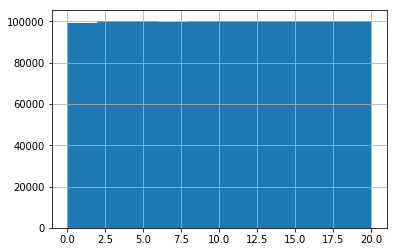

In [7]:
pop1.hist()

Hmmm.... a uniform distribution with values ranging from 0 to 20.

Let's try to grab a bunch of samples, compute their means, then plot those means.

In [10]:
def get_lots_of_sample_means(nums, how_many_per_sample, how_many_samples):
    sample_means = []
    for i in range(how_many_samples):
        sample = get_random_sample(nums, how_many_per_sample)
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    return pd.Series(sample_means)

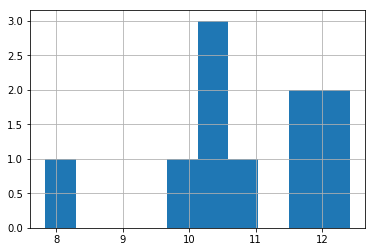

In [11]:
pop1_sample_means = get_lots_of_sample_means(pop1, 10, 10)
pop1_sample_means.hist()

Let's see this histogram build as we increase the number of samples included in our histogram.

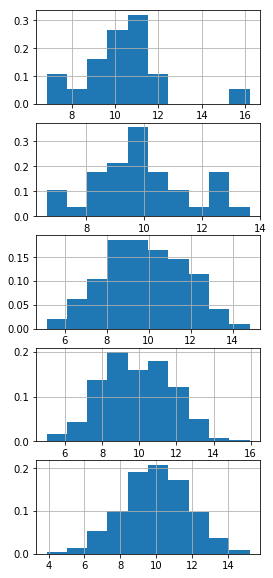

In [12]:
fig = plt.figure(figsize=(4,10))
plt.title('Random Distributions')
axes = []

for i in range(5):
    num_samples = (1 + 3**i) * 10
    pop_sample_means = get_lots_of_sample_means(pop1, 10, num_samples)
    ax = plt.subplot2grid((5,1), (i,0))
    pop_sample_means.hist(ax=ax, density=True)
    axes.append(ax)

Looks pretty normal to me! Let's do one more to make sure.

In [ ]:
pop_sample_means = get_lots_of_sample_means(pop1, 10, 10000) #Generate histogram of 10,000 sample means
pop_sample_means.hist(density=True)

What you've just witnessed is the Central Limit Theorem in action. CLT states that the sampling distribution of the mean of any independent, random variable will be normal (or nearly normal), *if the sample size is large enough*... even if the original variables themselves are not normally distributed.

In plain english, what CTL is saying is that the **means** of samples can be assumed to be normally distributed, assuming the samples are large enough. This says *nothing* of our ability to make inferences about the distribution of the underlying data.

In practical terms, what we are capable of saying is that given a large enough sample, I can estimate the confidence interval for where the true mean of a population is based on the mean and standard deviation of sufficient sample.

#### Using Student's T-Distribution to Understand Population Mean

While I showed you how to generate the distribution of means based on many samples of data, we're typically only given a single sample. This sample is what we used to compute the confidence interval for the true population mean.

Let's go back to taking a single measurement from pop1.

In [13]:
sample_size = 30
sample = get_random_sample(pop1, sample_size)

In [14]:
sample_mean = sample.mean()
sample_sd = sample.std()
print('mean:', sample_mean)
print('std:', sample_sd)

mean: 9.305297039090492
std: 5.217965229713846


The formula for determining the confidence interval for finding the true mean is:


\begin{equation*}
\mu = \bar{x} \pm t\frac{s}{\sqrt{n}}
\end{equation*}
where t can be found in the table below.

<img src="https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/TTable.jpg" width=400 height=400>

In [15]:
def compute_confidence_interval(sample, sample_size):
    t95 = 2.045
    sample_mean = sample.mean()
    sample_sd = sample.std()
    confidence_interval = [sample_mean - t95 * sample_sd / np.sqrt(sample_size), sample_mean + t95 * sample_sd / np.sqrt(sample_size)]
    return confidence_interval

In [16]:
compute_confidence_interval(sample, 30)

[7.357095573120348, 11.253498505060637]

What does a 95% confidence interval *really* mean?

In [17]:
confidence_interval_definition()

If we used the same sampling method to select different samples and computed an interval estimate for each sample, we would expect the true population parameter to fall within the interval estimates 95% of the time.


Let's try it!

In [18]:
def compute_confidence_interval_success(population):
    true_mean_in_range = []
    for i in range(50000):
        sample = get_random_sample(population, 30)
        ci = compute_confidence_interval(sample, 30)
        if (ci[0] <= 10) and (ci[1] >= 10):
            result = True
        else:
            result = False
        true_mean_in_range.append(result)
    pct_true = pd.Series(true_mean_in_range).mean()
    return pct_true

In [19]:
compute_confidence_interval_success(generator2(100000))

0.94438

#### Does the distribution of the underlying data matter?

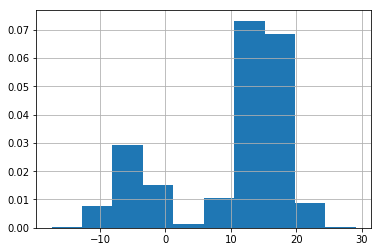

In [20]:
pop_to_analyze = generator5(num_vals)
pop_to_analyze.hist(density=True)

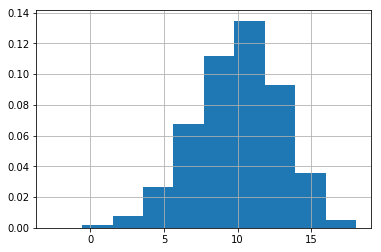

In [21]:
pop_sample_means = get_lots_of_sample_means(pop_to_analyze, 10, 10000)
pop_sample_means.hist(density=True)

#### Bernoulli & Uniform Distribution -> Binomial & Chi-Squared Distribution

Bernoulli and Uniform Distributions are often used to measure the outcomes of trials. A Bernoulli trial would represent strictly two possible outcomes and uniform distributions being one of many outcomes (note that since these are discrete values, the pdf is now called a probability mass function, or pmf). Think of Bernoulli trial as a coin flip. Introductory examples typically use 50/50 probabilities for a heads or tails respectively, but it most definitely does not have to be. A Bernoulli trial could also represent whether someone clicked on an advertisement or not. It need only represent a situation with only two possible outcomes (e.g. click or no click).

A uniform distribution can be thought of akin to rolling a die. There is a one-sixth probability of a roll landing on any single number. With uniform distributions, you are bound to equal distributions.

Bernoulli and Uniform Distributions are not that useful by themselves. Rather they are inputs into more useful statistical tests utilizing the Binomial or Chi-Squared distributions (Chi-Squared actually has many use cases, we will only go over this one today).

A binomial distribution represents the probability of a specific number of successes of a Bernoulli trial given a certain number of trials. Given the following definitions, we will then go over the formula.

- x: The number of successes that result from the binomial experiment.
- n: The number of trials in the binomial experiment.
- P: The probability of success on an individual trial.

\begin{equation*}
b(x|n,P) = \frac{n!}{x!(n - x)!} * P^x * (1 - P_x)^{n - x}
\end{equation*}

Thus, given 10 fair coin flips, the probability of getting exactly 5 heads is:

In [22]:
from scipy.special import factorial
n = 3
x = 1
P = .5
(factorial(n) / (factorial(x)*factorial(n-x))) * P**x * (1 - P)**(n-x)

0.375

The possible outcomes are:
- HHH
- HHT
- HTH
- THH
- HTT
- THT
- TTH
- TTT

If we wanted the probabilities of all possible number of heads given n trials, we could write the following function:

In [ ]:
def compute_single_binomial_probability(num_trials, num_successes, prob):
    n = num_trials
    x = num_successes
    p = prob
    
    p_x_successes = (factorial(n) / (factorial(x)*factorial(n-x))) * (p**x) * ((1 - p)**(n-x))
    return p_x_successes


def generate_all_probabilities(num_trials, prob):
    all_probs = []
    for i in range(num_trials + 1):
        binomial_prob = compute_single_binomial_probability(num_trials, i, prob)
        all_probs.append(binomial_prob)
    return pd.Series(all_probs)

coin_flip_10 = generate_all_probabilities(10, .5)

In [ ]:
compute_single_binomial_probability(10, 5, .5)

In [ ]:
coin_flip_10.plot(kind='bar')

In [ ]:
#There's a library for this too :)
import scipy.stats as ss
coin_flip_10 = ss.binom(10, .5)

In [ ]:
coin_flip_10.pmf(5)

The chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies of possible outcomes and the observed frequencies. Similarly to the binomial test and testing a coin, the chi-squared test can be used to measure the fairness of a die. We will go over the specifics of this test next week as we go more in-depth regarding hypothesis testing.